In [ ]:
# %% [markdown]
"""
# Análisis Comparativo de Modelos de Predicción de Llamadas

Este análisis compara el desempeño de tres modelos de predicción:
1. Nuevo Modelo (Llamadas_Predichas)
2. Modelo Antiguo (Predecidas_off)
3. Modelo Genesys (Predecidas_gen)

El objetivo es evaluar cuál modelo se ajusta mejor a los valores reales.
"""
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de estilo
plt.style.use('Solarize_Light2')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# %% [markdown]
"""
## 1. Carga y Preparación de Datos
"""
# %%
# Cargar los datos
df = pd.read_csv(r"C:\Users\ignac\Downloads\hist_pred.csv")


Tipos de datos:
Fecha                 datetime64[ns]
Es_Cyber                       int64
Llamadas_Predichas             int64
PI_Lower                     float64
PI_Upper                     float64
Reales                       float64
Predecidas_off               float64
Predecidas_gen                 int64
dtype: object

Valores nulos por columna:
Fecha                  0
Es_Cyber               0
Llamadas_Predichas     0
PI_Lower               0
PI_Upper               0
Reales                67
Predecidas_off        37
Predecidas_gen         0
dtype: int64

Primeras filas del dataset:


,Fecha,Es_Cyber,Llamadas_Predichas,PI_Lower,PI_Upper,Reales,Predecidas_off,Predecidas_gen
0,2025-04-01,0,3557,3436.942139,3676.295654,4137.0,4323.0,4828
1,2025-04-02,0,3263,3143.004395,3382.357910,3563.0,4065.0,4490
2,2025-04-03,0,3872,3751.903320,3991.256836,3192.0,3359.0,3883
3,2025-04-04,0,2971,2851.289795,3090.643311,3196.0,3266.0,3821
4,2025-04-05,0,1728,1608.411377,1847.764648,1669.0,1621.0,2000



Estadísticas descriptivas:


,Fecha,Es_Cyber,Llamadas_Predichas,PI_Lower,PI_Upper,Reales,Predecidas_off,Predecidas_gen
count,98,98.000000,98.000000,98.000000,98.000000,31.000000,61.000000,98.000000
mean,2025-05-27 23:15:55.102040832,0.051020,2614.571429,2497.257298,2735.789046,2347.548387,2618.163934,2675.163265
min,2025-04-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-04-25 06:00:00,0.000000,1756.250000,1636.520203,1875.873474,1338.500000,1591.000000,1765.250000
50%,2025-05-26 12:00:00,0.000000,2721.000000,2601.437256,2840.790772,2757.000000,2961.000000,2867.000000
75%,2025-06-18 18:00:00,0.000000,3206.000000,3086.424499,3325.778015,3099.000000,3352.000000,3596.000000
max,2025-12-05 00:00:00,1.000000,6083.000000,5963.248535,6202.602051,4137.000000,4859.000000,5385.000000
std,NaN,0.221171,1249.571093,1246.093272,1251.264216,1134.212674,1143.653855,1180.270838



Distribución de días Cyber:
Es_Cyber
0    93
1     5
Name: count, dtype: int64


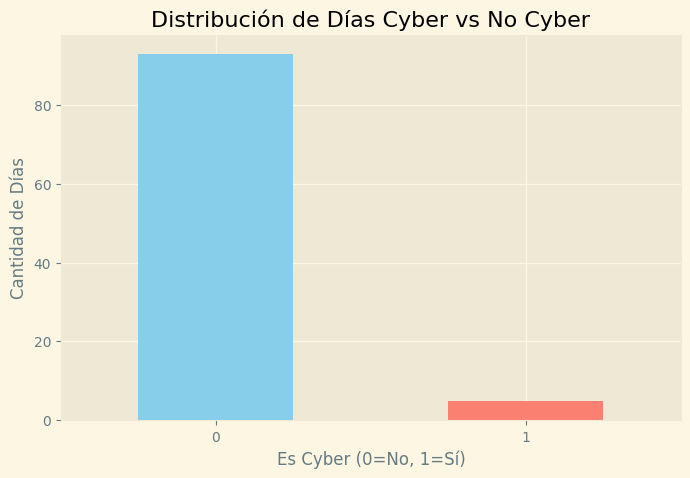

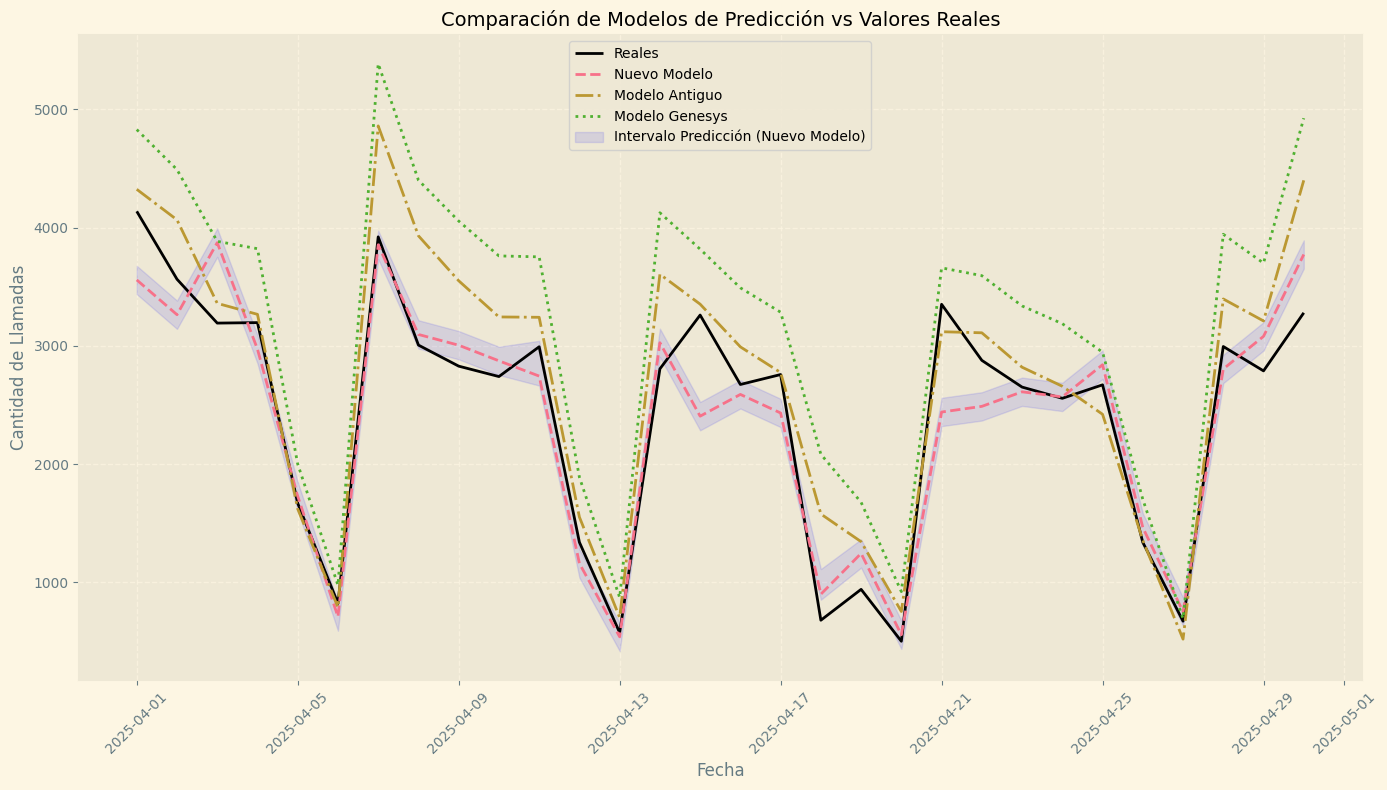


Métricas de Error por Modelo:


,Modelo,MAE,MSE,RMSE,R²,Error % Promedio
0,Nuevo Modelo,255.066667,118226.333333,343.840564,0.892190,11.279441
1,Modelo Antiguo,352.066667,218796.933333,467.757344,0.800480,18.942487
2,Modelo Genesys,747.300000,724843.833333,851.377609,0.339017,37.565704


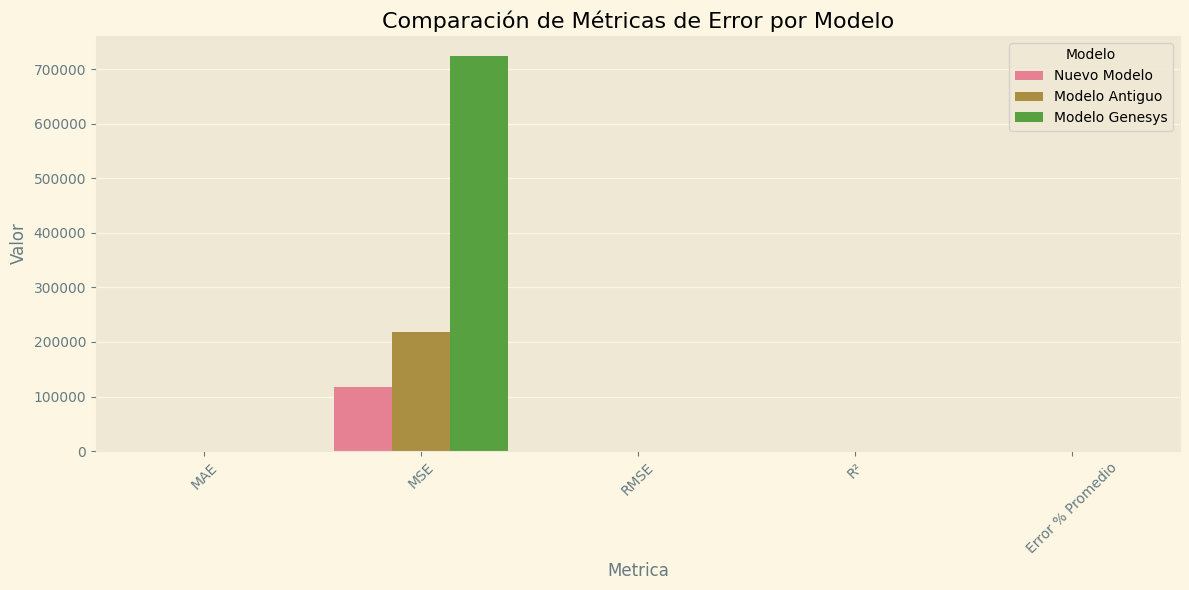


Error porcentual promedio por día de la semana:


C:\Users\ignac\AppData\Local\Temp\ipykernel_24400\4223440950.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_reales['Dia_Semana'] = df_with_reales['Fecha'].dt.day_name()
C:\Users\ignac\AppData\Local\Temp\ipykernel_24400\4223440950.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_reales['Error_Nuevo_%'] = np.abs((df_with_reales['Reales'] - df_with_reales['Llamadas_Predichas']) / df_with_reales['Reales']) * 100
C:\Users\ignac\AppData\Local\Temp\ipykernel_24400\4223440950.py:121: Set

,Error_Nuevo_%,Error_Antiguo_%,Error_Genesys_%
Dia_Semana,,,
Monday,10.779869,18.198282,31.321063
Tuesday,13.447063,12.258327,27.545104
Wednesday,6.873037,18.402078,35.202925
Thursday,9.603733,7.058303,25.669035
Friday,13.512201,37.974274,65.404343
Saturday,14.656583,15.738860,41.581778
Sunday,10.643299,24.773430,39.331529


<Figure size 1200x600 with 0 Axes>

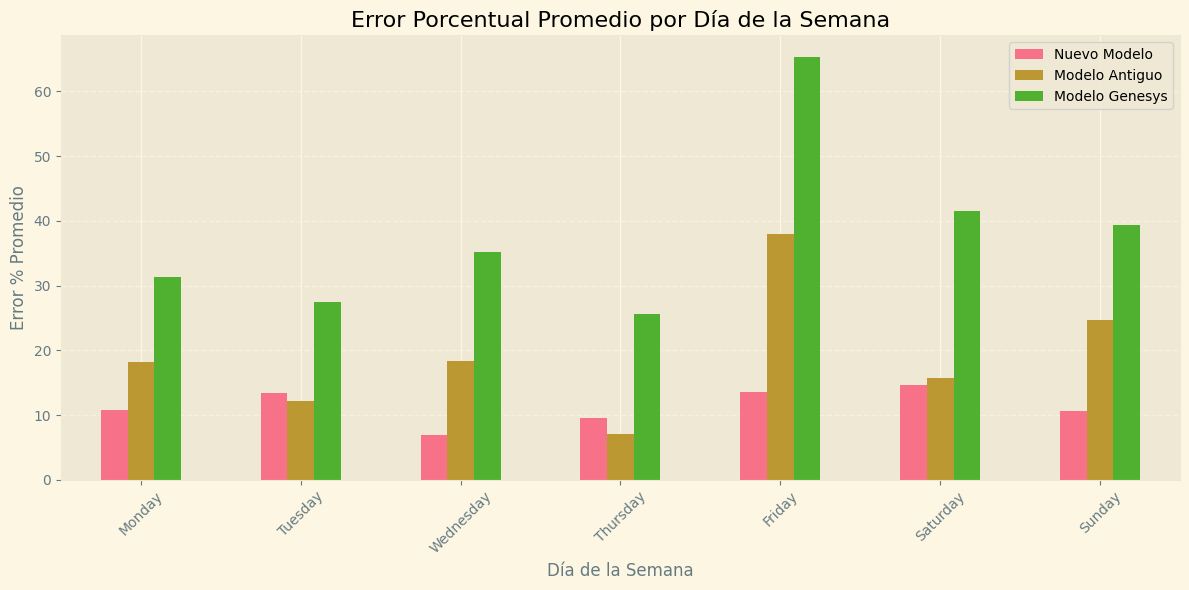


El 36.67% de los valores reales caen dentro del intervalo de predicción del nuevo modelo.


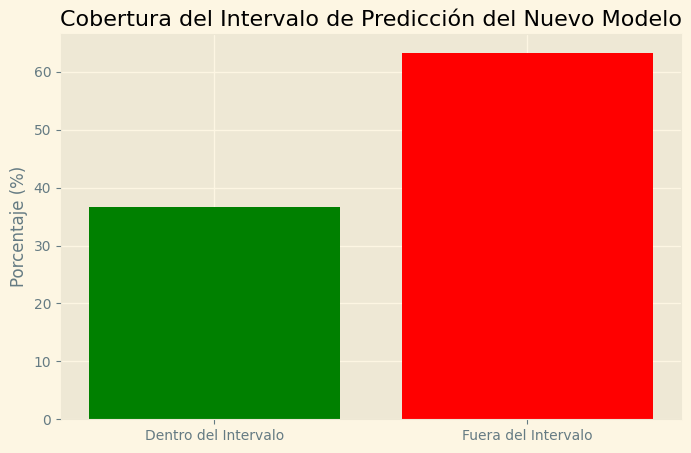


Comparación de desempeño en días Cyber vs No Cyber:


,Modelo,MAE Cyber,MAE No Cyber,Error % Cyber,Error % No Cyber
0,Nuevo Modelo,NaN,NaN,NaN,NaN
1,Modelo Antiguo,NaN,NaN,NaN,NaN
2,Modelo Genesys,NaN,NaN,NaN,NaN


<Figure size 1200x600 with 0 Axes>

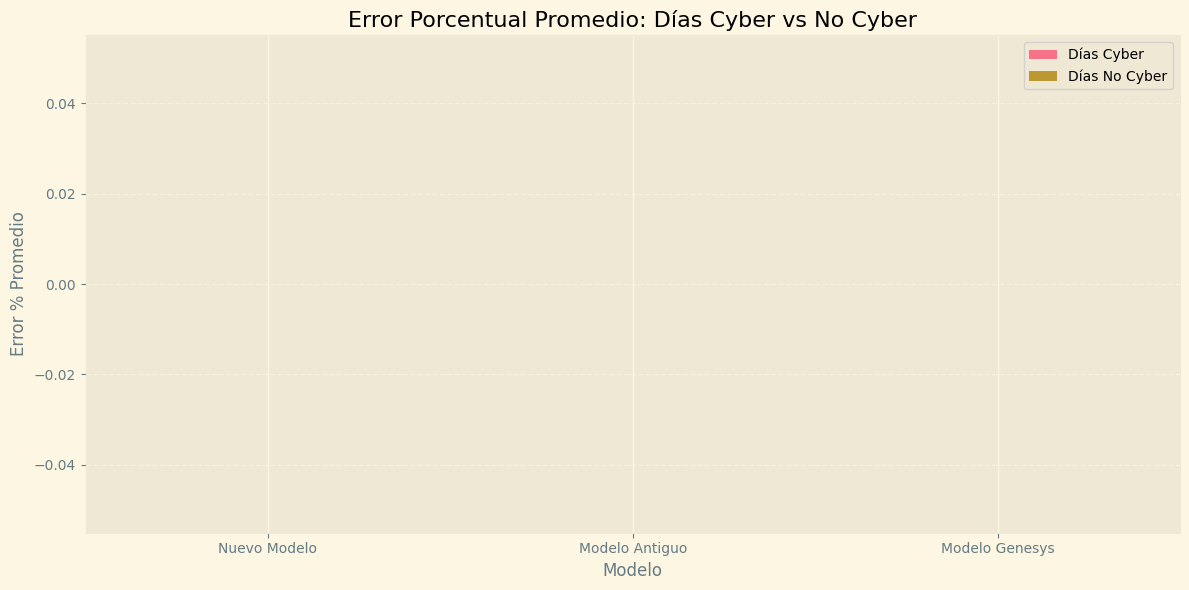

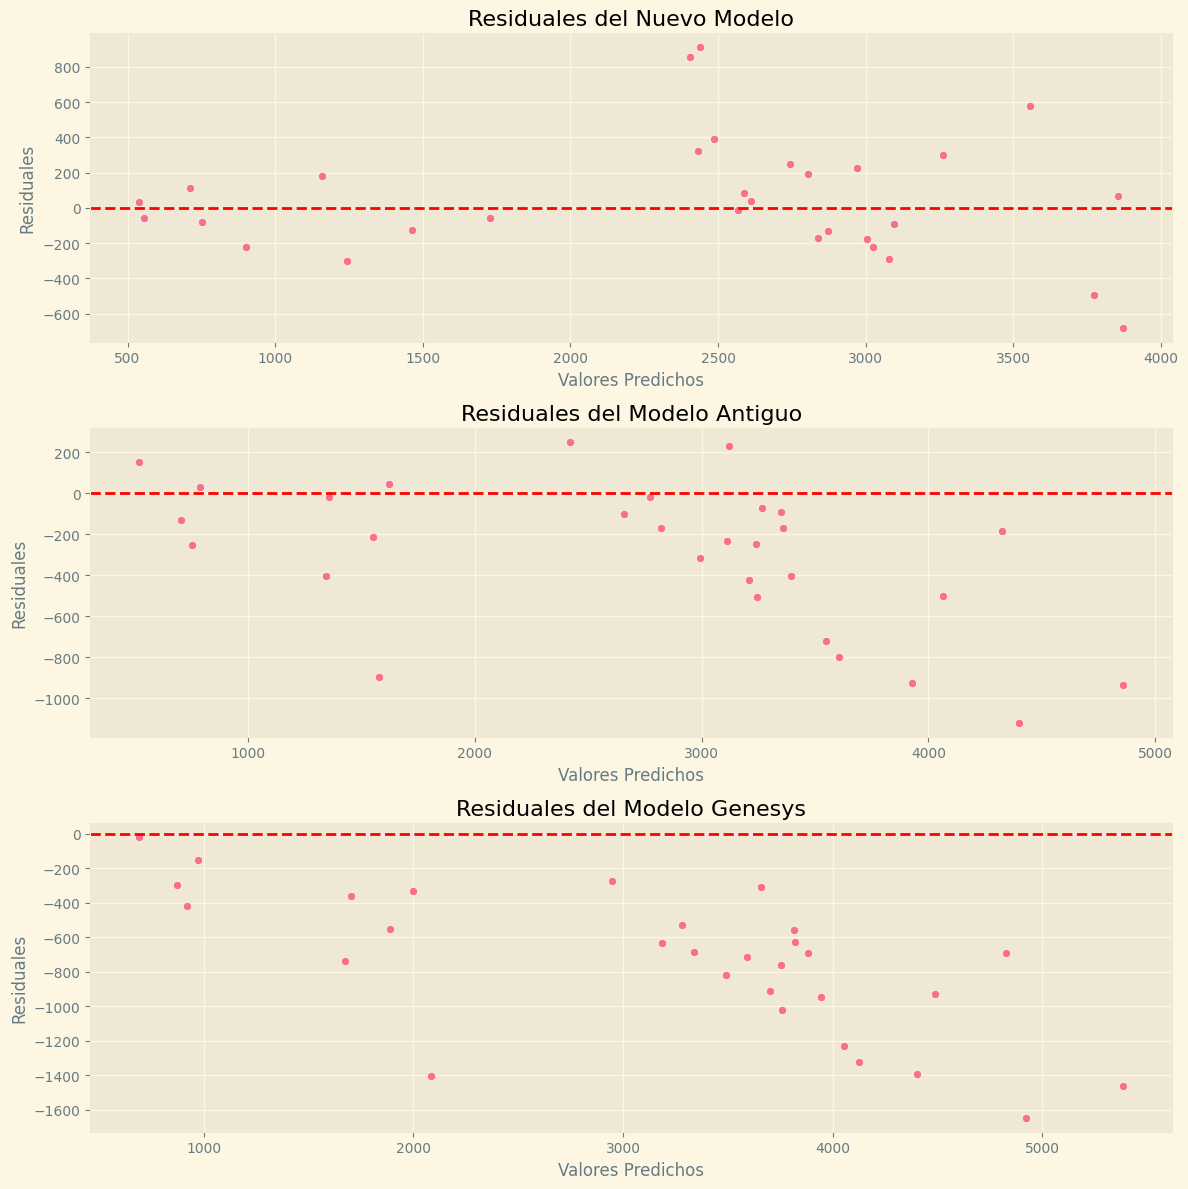


CONCLUSIONES Y RECOMENDACIONES:

1. Según el Error Absoluto Medio (MAE), el mejor modelo es: Nuevo Modelo
2. Según el Error Porcentual Promedio, el mejor modelo es: Nuevo Modelo
3. Según el Coeficiente de Determinación (R²), el mejor modelo es: Nuevo Modelo

4. El nuevo modelo incluye un intervalo de predicción que cubre el 36.67% de los valores reales.

5. Comparación de errores en días Cyber vs No Cyber:


,Modelo,Error % Cyber,Error % No Cyber
0,Nuevo Modelo,NaN,NaN
1,Modelo Antiguo,NaN,NaN
2,Modelo Genesys,NaN,NaN



RECOMENDACIÓN FINAL:
El modelo Nuevo Modelo muestra el mejor desempeño en todas las métricas clave y debería ser el preferido.


In [29]:
# Convertir la columna Fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='mixed', dayfirst=True)

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar primeras filas
print("\nPrimeras filas del dataset:")
display(df.head())

# %% [markdown]
"""
## 2. Análisis Exploratorio Inicial
"""
# %%
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

# Distribución de días Cyber vs No Cyber
cyber_counts = df['Es_Cyber'].value_counts()
print("\nDistribución de días Cyber:")
print(cyber_counts)

plt.figure(figsize=(8, 5))
cyber_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Días Cyber vs No Cyber')
plt.xlabel('Es Cyber (0=No, 1=Sí)')
plt.ylabel('Cantidad de Días')
plt.xticks(rotation=0)
plt.show()

# %% [markdown]
"""
## 3. Visualización de Series de Tiempo
"""
# %%
# Filtrar datos hasta 30-04-2025 donde tenemos valores reales
df_with_reales = df[df['Reales'].notna() & (df['Fecha'] <= '2025-04-30')]

plt.figure(figsize=(14, 8))
plt.plot(df_with_reales['Fecha'], df_with_reales['Reales'], label='Reales', linewidth=2, color='black')
plt.plot(df_with_reales['Fecha'], df_with_reales['Llamadas_Predichas'], label='Nuevo Modelo', linestyle='--')
plt.plot(df_with_reales['Fecha'], df_with_reales['Predecidas_off'], label='Modelo Antiguo', linestyle='-.')
plt.plot(df_with_reales['Fecha'], df_with_reales['Predecidas_gen'], label='Modelo Genesys', linestyle=':')

# Rellenar el intervalo de predicción del nuevo modelo
plt.fill_between(df_with_reales['Fecha'], 
                df_with_reales['PI_Lower'], 
                df_with_reales['PI_Upper'], 
                color='blue', alpha=0.1, label='Intervalo Predicción (Nuevo Modelo)')

plt.title('Comparación de Modelos de Predicción vs Valores Reales', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Llamadas', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% [markdown]
"""
## 4. Análisis de Errores por Modelo
"""
# %%
# Calcular métricas de error para cada modelo
def calculate_metrics(real, pred, model_name):
    mae = mean_absolute_error(real, pred)
    mse = mean_squared_error(real, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(real, pred)
    error_percent = np.mean(np.abs((real - pred) / real)) * 100
    
    return {
        'Modelo': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Error % Promedio': error_percent
    }

# Datos disponibles con valores reales (excluyendo el día sin trabajo 01-05-2025)
valid_data = df_with_reales[df_with_reales['Reales'] > 0]

metrics = [
    calculate_metrics(valid_data['Reales'], valid_data['Llamadas_Predichas'], 'Nuevo Modelo'),
    calculate_metrics(valid_data['Reales'], valid_data['Predecidas_off'], 'Modelo Antiguo'),
    calculate_metrics(valid_data['Reales'], valid_data['Predecidas_gen'], 'Modelo Genesys')
]

metrics_df = pd.DataFrame(metrics)
print("\nMétricas de Error por Modelo:")
display(metrics_df)

# Visualización de métricas
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars='Modelo', var_name='Metrica', value_name='Valor'), 
            x='Metrica', y='Valor', hue='Modelo')
plt.title('Comparación de Métricas de Error por Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% [markdown]
"""
## 5. Análisis de Errores por Día de la Semana
"""
# %%
# Agregar día de la semana
df_with_reales['Dia_Semana'] = df_with_reales['Fecha'].dt.day_name()

# Calcular error absoluto porcentual para cada modelo
df_with_reales['Error_Nuevo_%'] = np.abs((df_with_reales['Reales'] - df_with_reales['Llamadas_Predichas']) / df_with_reales['Reales']) * 100
df_with_reales['Error_Antiguo_%'] = np.abs((df_with_reales['Reales'] - df_with_reales['Predecidas_off']) / df_with_reales['Reales']) * 100
df_with_reales['Error_Genesys_%'] = np.abs((df_with_reales['Reales'] - df_with_reales['Predecidas_gen']) / df_with_reales['Reales']) * 100

# Agrupar por día de la semana
error_by_day = df_with_reales.groupby('Dia_Semana')[[f'Error_{x}_%' for x in ['Nuevo', 'Antiguo', 'Genesys']]].mean()

# Reordenar días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
error_by_day = error_by_day.reindex(days_order)

print("\nError porcentual promedio por día de la semana:")
display(error_by_day)

# Visualización
plt.figure(figsize=(12, 6))
error_by_day.plot(kind='bar')
plt.title('Error Porcentual Promedio por Día de la Semana')
plt.ylabel('Error % Promedio')
plt.xlabel('Día de la Semana')
plt.xticks(rotation=45)
plt.legend(['Nuevo Modelo', 'Modelo Antiguo', 'Modelo Genesys'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# %% [markdown]
"""
## 6. Análisis de Aciertos dentro del Intervalo de Predicción
"""
# %%
# Verificar cuántas veces los valores reales caen dentro del intervalo de predicción
within_interval = (valid_data['Reales'] >= valid_data['PI_Lower']) & (valid_data['Reales'] <= valid_data['PI_Upper'])
coverage = within_interval.mean() * 100

print(f"\nEl {coverage:.2f}% de los valores reales caen dentro del intervalo de predicción del nuevo modelo.")

# Visualización
plt.figure(figsize=(8, 5))
plt.bar(['Dentro del Intervalo', 'Fuera del Intervalo'], 
        [coverage, 100 - coverage], 
        color=['green', 'red'])
plt.title('Cobertura del Intervalo de Predicción del Nuevo Modelo')
plt.ylabel('Porcentaje (%)')
plt.show()

# %% [markdown]
"""
## 7. Análisis de Errores en Días Cyber vs No Cyber
"""
# %%
# Separar datos Cyber vs No Cyber
cyber_data = valid_data[valid_data['Es_Cyber'] == 1]
non_cyber_data = valid_data[valid_data['Es_Cyber'] == 0]

# Calcular métricas para cada grupo
def compare_cyber_groups(data_cyber, data_non_cyber, model_col, model_name):
    if data_cyber.empty or data_non_cyber.empty:
        return {
            'Modelo': model_name,
            'MAE Cyber': np.nan,
            'MAE No Cyber': np.nan,
            'Error % Cyber': np.nan,
            'Error % No Cyber': np.nan
        }
    
    mae_cyber = mean_absolute_error(data_cyber['Reales'], data_cyber[model_col])
    mae_non_cyber = mean_absolute_error(data_non_cyber['Reales'], data_non_cyber[model_col])
    
    error_cyber = np.mean(np.abs((data_cyber['Reales'] - data_cyber[model_col]) / data_cyber['Reales'])) * 100
    error_non_cyber = np.mean(np.abs((data_non_cyber['Reales'] - data_non_cyber[model_col]) / data_non_cyber['Reales'])) * 100
    
    return {
        'Modelo': model_name,
        'MAE Cyber': mae_cyber,
        'MAE No Cyber': mae_non_cyber,
        'Error % Cyber': error_cyber,
        'Error % No Cyber': error_non_cyber
    }

cyber_comparison = [
    compare_cyber_groups(cyber_data, non_cyber_data, 'Llamadas_Predichas', 'Nuevo Modelo'),
    compare_cyber_groups(cyber_data, non_cyber_data, 'Predecidas_off', 'Modelo Antiguo'),
    compare_cyber_groups(cyber_data, non_cyber_data, 'Predecidas_gen', 'Modelo Genesys')
]

cyber_comparison_df = pd.DataFrame(cyber_comparison)
print("\nComparación de desempeño en días Cyber vs No Cyber:")
display(cyber_comparison_df)

# Visualización
plt.figure(figsize=(12, 6))
cyber_comparison_df[['Error % Cyber', 'Error % No Cyber']].plot(kind='bar')
plt.title('Error Porcentual Promedio: Días Cyber vs No Cyber')
plt.ylabel('Error % Promedio')
plt.xlabel('Modelo')
plt.xticks(range(3), ['Nuevo Modelo', 'Modelo Antiguo', 'Modelo Genesys'], rotation=0)
plt.legend(['Días Cyber', 'Días No Cyber'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# %% [markdown]
"""
## 8. Análisis de Residuales
"""
# %%
# Calcular residuales para cada modelo
valid_data['Residual_Nuevo'] = valid_data['Reales'] - valid_data['Llamadas_Predichas']
valid_data['Residual_Antiguo'] = valid_data['Reales'] - valid_data['Predecidas_off']
valid_data['Residual_Genesys'] = valid_data['Reales'] - valid_data['Predecidas_gen']

# Gráficos de residuales
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Nuevo Modelo
sns.scatterplot(x=valid_data['Llamadas_Predichas'], y=valid_data['Residual_Nuevo'], ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Residuales del Nuevo Modelo')
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuales')

# Modelo Antiguo
sns.scatterplot(x=valid_data['Predecidas_off'], y=valid_data['Residual_Antiguo'], ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Residuales del Modelo Antiguo')
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuales')

# Modelo Genesys
sns.scatterplot(x=valid_data['Predecidas_gen'], y=valid_data['Residual_Genesys'], ax=axes[2])
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_title('Residuales del Modelo Genesys')
axes[2].set_xlabel('Valores Predichos')
axes[2].set_ylabel('Residuales')

plt.tight_layout()
plt.show()

# %% [markdown]
"""
## 9. Conclusiones y Recomendaciones
"""
# %%
print("\nCONCLUSIONES Y RECOMENDACIONES:")

# Identificar el mejor modelo según MAE
best_model_mae = metrics_df.loc[metrics_df['MAE'].idxmin(), 'Modelo']
print(f"\n1. Según el Error Absoluto Medio (MAE), el mejor modelo es: {best_model_mae}")

# Identificar el mejor modelo según Error % Promedio
best_model_error = metrics_df.loc[metrics_df['Error % Promedio'].idxmin(), 'Modelo']
print(f"2. Según el Error Porcentual Promedio, el mejor modelo es: {best_model_error}")

# Identificar el mejor modelo según R²
best_model_r2 = metrics_df.loc[metrics_df['R²'].idxmax(), 'Modelo']
print(f"3. Según el Coeficiente de Determinación (R²), el mejor modelo es: {best_model_r2}")

# Comparación de intervalos de predicción
print(f"\n4. El nuevo modelo incluye un intervalo de predicción que cubre el {coverage:.2f}% de los valores reales.")

# Análisis de días Cyber
cyber_errors = cyber_comparison_df[['Modelo', 'Error % Cyber', 'Error % No Cyber']]
print("\n5. Comparación de errores en días Cyber vs No Cyber:")
display(cyber_errors)

# Recomendación final
print("\nRECOMENDACIÓN FINAL:")
if best_model_mae == best_model_error == best_model_r2:
    print(f"El modelo {best_model_mae} muestra el mejor desempeño en todas las métricas clave y debería ser el preferido.")
else:
    print("Los modelos muestran diferentes fortalezas según la métrica considerada. Se recomienda:")
    print(f"- Para precisión general: {best_model_mae}")
    print(f"- Para menor error porcentual: {best_model_error}")
    print(f"- Para mejor ajuste a los datos: {best_model_r2}")
    print("\nConsiderar también la cobertura del intervalo de predicción del nuevo modelo y su desempeño en días especiales (Cyber).")

In [26]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [27]:
df.head()

,Fecha,Es_Cyber,Llamadas_Predichas,PI_Lower,PI_Upper,Reales,Predecidas_off,Predecidas_gen
0,2025-04-01,0,3557,3436.942139,3676.295654,4137.0,4323.0,4828
1,2025-04-02,0,3263,3143.004395,3382.357910,3563.0,4065.0,4490
2,2025-04-03,0,3872,3751.903320,3991.256836,3192.0,3359.0,3883
3,2025-04-04,0,2971,2851.289795,3090.643311,3196.0,3266.0,3821
4,2025-04-05,0,1728,1608.411377,1847.764648,1669.0,1621.0,2000


In [28]:
import pandas as pd

# Load your dataset
file_path = r"C:\Users\ignac\Downloads\hist_pred.csv"
df = pd.read_csv(file_path)

# Adjust Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust display width
pd.set_option('display.colheader_justify', 'left')  # Align column headers to the left

# Display the entire DataFrame
print(df)

   Fecha        Es_Cyber  Llamadas_Predichas  PI_Lower     PI_Upper     \
0     1/4/2025  0         3557                3436.942139  3676.295654   
1     2/4/2025  0         3263                3143.004395  3382.357910   
2     3/4/2025  0         3872                3751.903320  3991.256836   
3     4/4/2025  0         2971                2851.289795  3090.643311   
4     5/4/2025  0         1728                1608.411377  1847.764648   
5     6/4/2025  0          710                 590.655518   830.008911   
6     7/4/2025  0         3854                3734.240479  3973.593994   
7     8/4/2025  0         3096                2976.786865  3216.140381   
8     9/4/2025  0         3005                2885.512207  3124.865723   
9    10/4/2025  0         2873                2752.938477  2992.291992   
10   11/4/2025  0         2744                2664.120000  3042.220000   
11   12/4/2025  0         1160                1040.127686  1279.480957   
12  13-04-2025  0          540        